# **1 Function Definition**

### 1.1 Importing Libraries

In [170]:
import itertools
import warnings
import numpy            as np
import pandas           as pd
import statsmodels.api  as sm
import seaborn          as sns
import matplotlib.pylab as plt
import scipy.stats      as stats

warnings.filterwarnings("ignore")

###  1.2   Reading dataset function



In [171]:
def load_dataset(filename):

    data_base = pd.read_excel(filename, index_col=0)
    
    return data_base

###  1.3 Cox-Stuart test function

In [172]:
def cox_stuart(timeseries):

  import json

  n = len(timeseries)
  timeseries_c = timeseries
  if n % 2 == 1:
    del timeseries_c[n // 2]
  c = n // 2

  n_pos = n_neg = 0
  for i in range(c):
    diff = timeseries_c[i + c] - timeseries[i]
    if diff > 0:
      n_pos += 1
    elif diff < 0:
      n_neg += 1
    else:
      continue

  number = n_pos + n_neg
  k = min(n_pos, n_neg)
  p_value = 2 * stats.binom.cdf(k, number, 0.5)
  trend = ['Increasing', 'Decreasing', 'No trend']

  if n_pos > n_neg and p_value < 0.05:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[0]))
  elif n_neg > n_pos and p_value < 0.05:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[1]))
  else:
    print('   fall: {}'.format(n_neg))
    print('   rise: {}'.format(n_pos))
    print('p-value: {}'.format(p_value))
    print('  trend: {}'.format(trend[2]))

###  1.4 Kruskal-Wallis test function

In [173]:
def kruskal_wallis(timeseries):

  from scipy import stats
  
  array = timeseries.to_numpy()

  n = int(len(timeseries) / 12)
  years = np.zeros([n, 12], dtype=int)

  i, j = 0, 12
  while i < n:
    years[i, :] = array[j-12:j]
    i += 1
    j += 12

  k_w = stats.kruskal(years[0, :], years[1, :], years[2, :], years[3, :], 
                       years[4, :], years[5, :], years[6, :], years[7, :], 
                       years[8, :], years[9, :], years[10, :], years[11, :], 
                       years[12, :], years[13, :])
  if k_w[1] <= 0.05:
    print('p-value:{}'.format(k_w[1]))
    print('This series is seasonal')
  else:
    print('p-value:{}'.format(k_w[1]))
    print('No seasonal')

###  1.5 Augmented Dickey-Fuller test function

In [174]:
def test_stationarity(timeseries):

  from statsmodels.tsa.stattools import adfuller

  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

###  1.6 ACF and PACF plotting function

In [175]:
def acf_pacf(dataframe, lags, title, color):

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

  sm.graphics.tsa.plot_acf(dataframe.values.squeeze(), lags=lags, title=title[0], ax=ax1, color=color)
  sm.graphics.tsa.plot_pacf(dataframe.values.squeeze(), lags=lags, title=title[1], ax=ax2, color=color)

  plt.show()

###  1.7   Função de amplitude-média

In [176]:
def amplitude_average(dataframe):

  mean_df = dataframe.groupby(dataframe.index.year).mean()
  max_df = dataframe.groupby(dataframe.index.year).max()
  min_df = dataframe.groupby(dataframe.index.year).min()
  w_df = max_df - min_df

  return mean_df, w_df

###  1.8 Função de transformação

In [177]:
def log_scale(timeseries):

  ln = np.log(timeseries + 1)
  ln_ts = pd.Series(ln, timeseries.index)

  return ln_ts

### 1.9 Coefficient estimation function

In [178]:
def estimate_coef(x, y): 
    
    n = np.size(x) 
  
    
    m_x, m_y = np.mean(x), np.mean(y) 
  
    
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return b_0, b_1

### 1.10 Lag features function

In [179]:
def lag_features(timeseries, lag):

  n = lag
  df = timeseries.copy()
  for i in range(n):
      df[f'x_{i+1}'] = df.shift(i + 1)
  df.dropna(axis=0, inplace=True)
  df.head()
  return df

# **2 Data Visualization and Preparation**


### 2.1   Reading datasets

In [180]:
data_set = load_dataset('dengue_belem_mensal_2007_2020.xlsx')
data_set

,dengue_cases
date,
2007-01-01,220
2007-02-01,364
2007-03-01,544
2007-04-01,327
2007-05-01,117
...,...
2020-08-01,3
2020-09-01,5
2020-10-01,2


### 2.2   Time series plotting

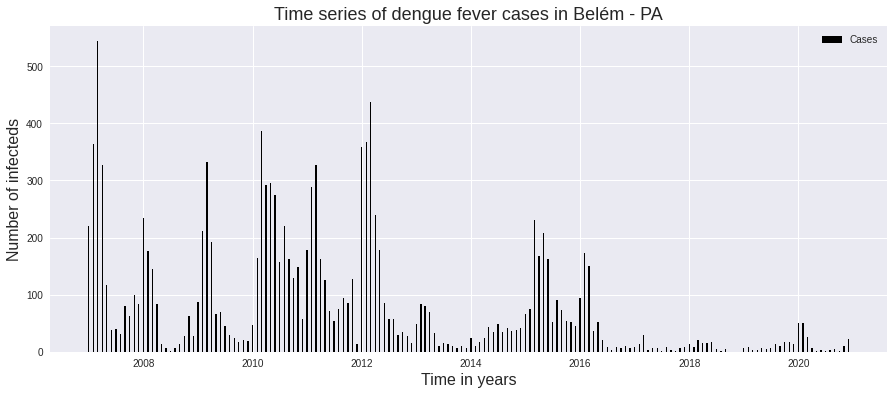

In [181]:
plt.style.use('seaborn')

fig1, ax = plt.subplots(figsize=(15, 6))

#ax.plot(data_set.index, data_set.dengue_cases, color='black', label='Dengue fever cases')
ax.bar(data_set.index, data_set.dengue_cases, 9, color='#000000', error_kw={'ecolor': '0.3'}, label='Cases')

ax.set_title('Time series of dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Number of infecteds', size=16)
ax.legend()

plt.show()

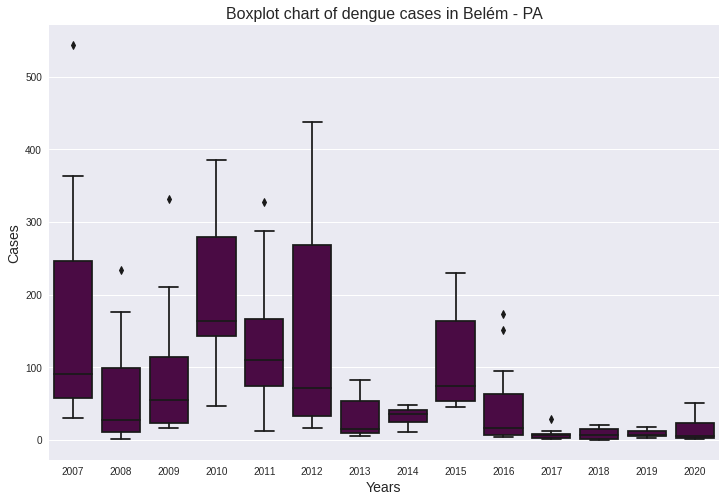

In [182]:
fig2, ax = plt.subplots(figsize=(12,8))

sns.boxplot(x=data_set.index.year, y=data_set.dengue_cases, ax=ax, color='#55004D')
ax.set_title('Boxplot chart of dengue cases in Belém - PA', size=16)
ax.set_xlabel('Years', size=14)
ax.set_ylabel('Cases', size=14)

plt.show();

### 2.3 Data Transformation

#### 2.3.1 Verification of the proportionality of means 

In [183]:
mean, w = amplitude_average(data_set.dengue_cases)
b_0, b_1 = estimate_coef(mean, w)
lr = b_0 + b_1 * mean

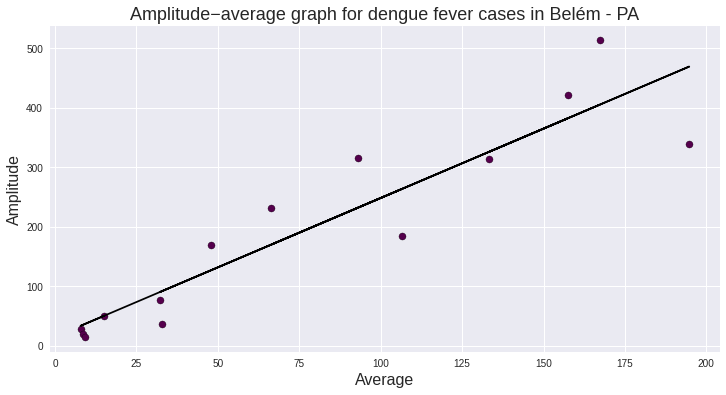

In [184]:
fig4, ax = plt.subplots(figsize=(12, 6))

ax.scatter(mean, w, s=50, edgecolor='black', c='#55004D')
ax.plot(mean, lr, color='#000000')
ax.set_title('Amplitude−average graph for dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Average', size=16)
ax.set_ylabel('Amplitude', size=16)

plt.show();

#### 2.3.2 Series logarithmization

In [185]:
data_set['dengue_log'] = log_scale(data_set.dengue_cases)
moving_avg = data_set.dengue_log.ewm(span=7).mean()
display(data_set)

,dengue_cases,dengue_log
date,,
2007-01-01,220,5.398163
2007-02-01,364,5.899897
2007-03-01,544,6.300786
2007-04-01,327,5.793014
2007-05-01,117,4.770685
...,...,...
2020-08-01,3,1.386294
2020-09-01,5,1.791759
2020-10-01,2,1.098612


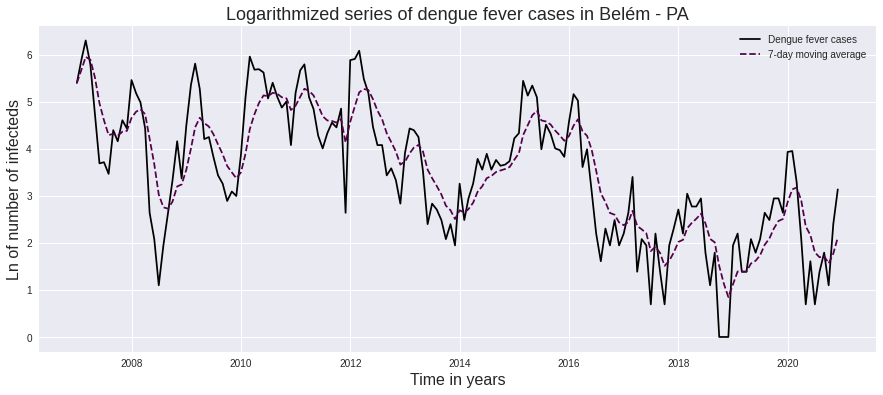

In [186]:
fig6, ax = plt.subplots(figsize=(15, 6))

ax.plot(data_set.dengue_log.index, data_set.dengue_log, color='black', label='Dengue fever cases')
ax.plot(data_set.dengue_log.index, moving_avg, color='#55004D', linestyle='--', label='7-day moving average')

ax.set_title('Logarithmized series of dengue fever cases in Belém - PA', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Ln of number of infecteds', size=16)
ax.legend()

plt.show()

### 2.3 Stationarity and hypothesis tests

#### 2.3.1 Hypothesis tests: Stationarity

In [187]:
print(test_stationarity(data_set.dengue_log))

Results of Dickey-Fuller Test:
Test Statistic                  -2.038603
p-value                          0.269907
#Lags Used                      13.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64
None


#### 2.3.2 Hypothesis tests: Trend

In [188]:
print(cox_stuart(data_set.dengue_log))

   fall: 69
   rise: 14
p-value: 6.802593482929834e-10
  trend: Decreasing
None


#### 2.3.3 Hypothesis tests: Seasonality

In [189]:
print(kruskal_wallis(data_set.dengue_log))

p-value:3.0324256342664704e-15
This series is seasonal
None


#### 2.3.4 Autocorrelation and Partial Autocorrelation Functions

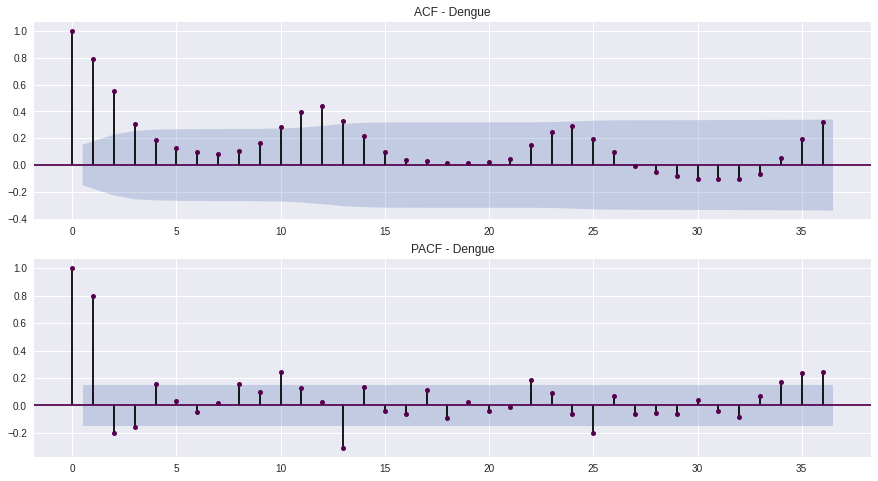

In [190]:
title = ['ACF - Dengue', 'PACF - Dengue']
acf_pacf(data_set.dengue_cases, 36, title, '#55004D')

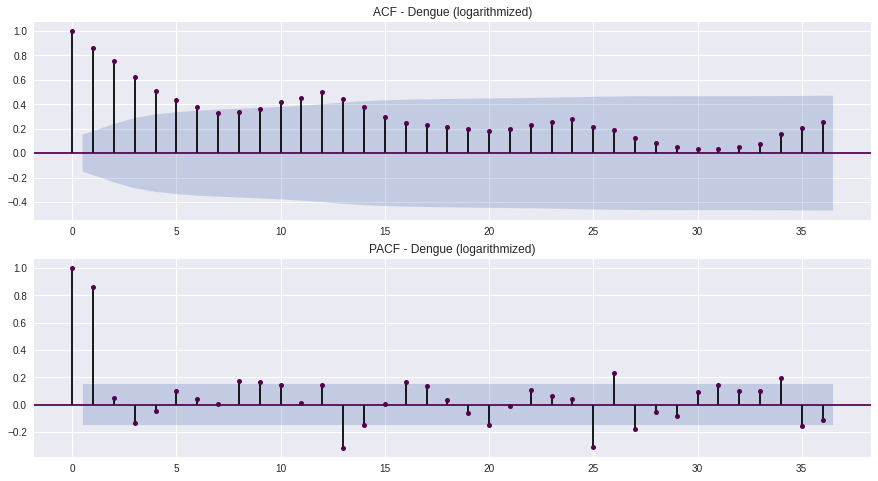

In [191]:
title = ['ACF - Dengue (logarithmized)', 'PACF - Dengue (logarithmized)']
acf_pacf(data_set.dengue_log, 36, title, '#55004D')

### 2.4 Lag features selection

In [192]:
n = 6
df = data_set[['dengue_log']].copy()
for i in range(n):
    df[f'x_{i+1}'] = df.dengue_log.shift(i + 1)
df.dropna(axis=0, inplace=True)
display(df)

,dengue_log,x_1,x_2,x_3,x_4,x_5,x_6
date,,,,,,,
2007-07-01,3.713572,3.688879,4.770685,5.793014,6.300786,5.899897,5.398163
2007-08-01,3.465736,3.713572,3.688879,4.770685,5.793014,6.300786,5.899897
2007-09-01,4.394449,3.465736,3.713572,3.688879,4.770685,5.793014,6.300786
2007-10-01,4.158883,4.394449,3.465736,3.713572,3.688879,4.770685,5.793014
2007-11-01,4.605170,4.158883,4.394449,3.465736,3.713572,3.688879,4.770685
...,...,...,...,...,...,...,...
2020-08-01,1.386294,0.693147,1.609438,0.693147,2.079442,3.295837,3.951244
2020-09-01,1.791759,1.386294,0.693147,1.609438,0.693147,2.079442,3.295837
2020-10-01,1.098612,1.791759,1.386294,0.693147,1.609438,0.693147,2.079442


In [193]:
exo = df.loc[:, ['x_1', 'x_2', 'x_3']]
display(exo)

,x_1,x_2,x_3
date,,,
2007-07-01,3.688879,4.770685,5.793014
2007-08-01,3.713572,3.688879,4.770685
2007-09-01,3.465736,3.713572,3.688879
2007-10-01,4.394449,3.465736,3.713572
2007-11-01,4.158883,4.394449,3.465736
...,...,...,...
2020-08-01,0.693147,1.609438,0.693147
2020-09-01,1.386294,0.693147,1.609438
2020-10-01,1.791759,1.386294,0.693147


# **3. SARIMAX Model Application**

### 3.1 Model building

In [194]:
def ts_model(timeseries, exog, freq, order, seasonal_order):

  from statsmodels.tsa.statespace.sarimax import SARIMAX

  model = SARIMAX(timeseries, exog=exog, freq=freq,
                  order=order, seasonal_order=seasonal_order).fit()

  model_pred = model.predict()

  pred = np.exp(model_pred) - 1

  return model

In [195]:
p = q = range(0, 2)
d = [1]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [196]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df.dengue_log, exog=exo,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)

            results = model.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 1, 0)x(0, 1, 0, 12) - AIC:366.748146687248
SARIMAX(0, 1, 0)x(0, 1, 1, 12) - AIC:312.4442339357029
SARIMAX(0, 1, 0)x(1, 1, 0, 12) - AIC:337.6118418709288
SARIMAX(0, 1, 0)x(1, 1, 1, 12) - AIC:314.3749872893658
SARIMAX(0, 1, 1)x(0, 1, 0, 12) - AIC:368.02509270098096
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:313.90604137075104
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:339.2497175651324
SARIMAX(0, 1, 1)x(1, 1, 1, 12) - AIC:315.8220707276222
SARIMAX(1, 1, 0)x(0, 1, 0, 12) - AIC:367.9727070943221
SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:314.1342403318092
SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:339.4957619592761
SARIMAX(1, 1, 0)x(1, 1, 1, 12) - AIC:316.07141471103245
SARIMAX(1, 1, 1)x(0, 1, 0, 12) - AIC:369.875444413022
SARIMAX(1, 1, 1)x(0, 1, 1, 12) - AIC:315.90282500215847
SARIMAX(1, 1, 1)x(1, 1, 0, 12) - AIC:341.13149224393374
SARIMAX(1, 1, 1)x(1, 1, 1, 12) - AIC:317.8168620377312


In [197]:
order = (0, 1, 0)
seasonal_order = (0, 1, 1, 12)

model = ts_model(df.dengue_log, exo, 'MS', order, seasonal_order)

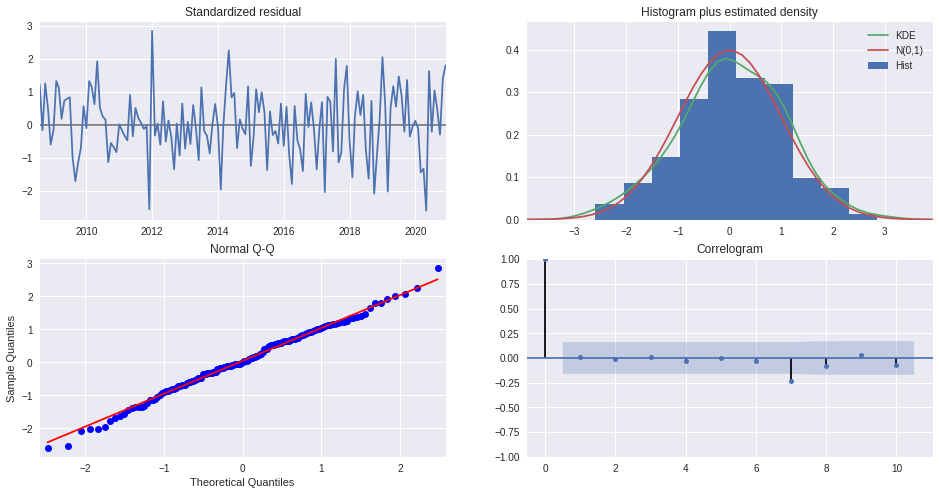

In [198]:
model.plot_diagnostics(figsize=(16, 8))
plt.show()

### 3.2 Validating forecasts

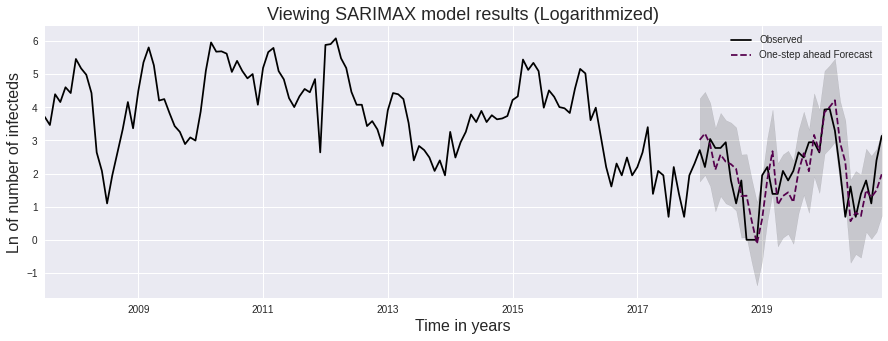

In [205]:
pred = model.get_prediction(exog=exo, start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df.dengue_log['2007':].plot(color='#000000', label='Observed')
pred.predicted_mean.plot(ax=ax, color='#55004D', linestyle='--', label='One-step ahead Forecast', figsize=(15, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_title('Viewing SARIMAX model results (Logarithmized)', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Ln of number of infecteds', size=16)
plt.legend(loc='upper hight')
plt.show()

In [206]:
predict = np.exp(pred.predicted_mean) - 1
predict_ci = np.exp(pred_ci) - 1

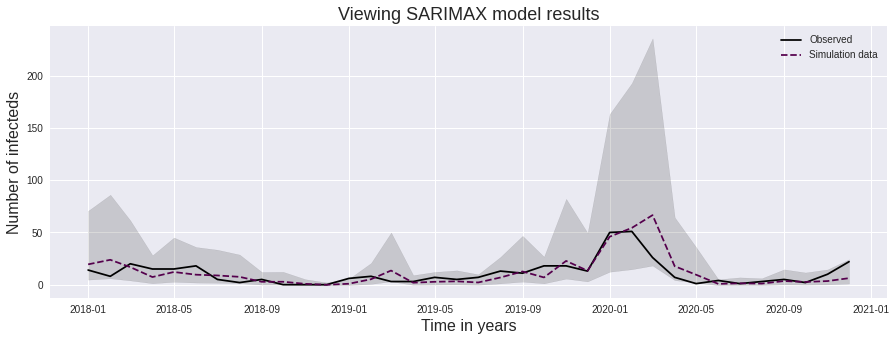

In [207]:
fig8, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(x=data_set.index[132:], y=data_set.dengue_cases[132:], color='black', label='Observed')
sns.lineplot(x=data_set.index[132:], y=predict, color='#55004D', linestyle='--', label='Simulation data')
ax.fill_between(predict_ci.index,
                predict_ci.iloc[:, 0],
                predict_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_title('Viewing SARIMAX model results', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Number of infecteds', size=16)
ax.legend()

plt.show()

In [214]:
rmse = np.sqrt(((data_set.dengue_cases[132:] - predict)**2).mean())
print('RMSE: {}'.format(rmse))

RMSE: 9.180703305580998


In [210]:
pred_uc = model.get_forecast(steps=36, exog=exo[126:])
pred_uc_ci = pred_uc.conf_int()
fcast_uc = np.exp(pred_uc.predicted_mean) - 1

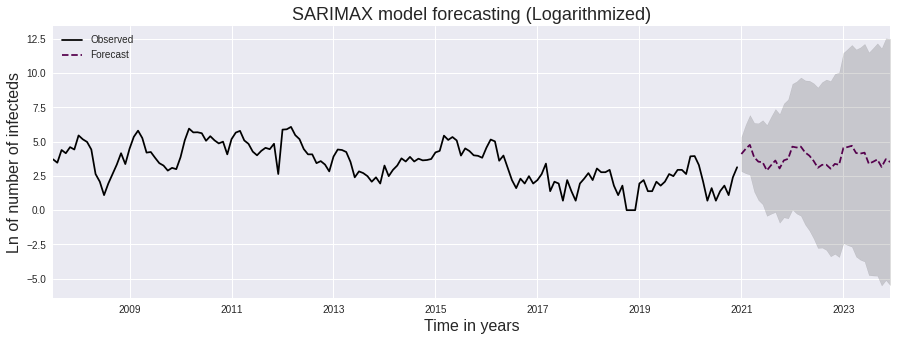

In [211]:
ax = df.dengue_log.plot(label='Observed', color='k', figsize=(15, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#55004D', linestyle='--')
ax.fill_between(pred_uc_ci.index,
                pred_uc_ci.iloc[:, 0],
                pred_uc_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_title('SARIMAX model forecasting (Logarithmized)', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Ln of number of infecteds', size=16)
plt.legend(loc='upper left')
plt.show()

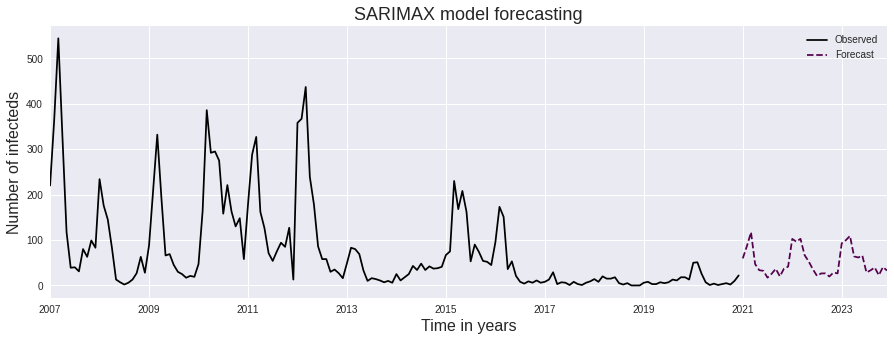

In [212]:
ax = data_set.dengue_cases.plot(label='Observed', color='k', figsize=(15, 5))
fcast_uc.plot(ax=ax, label='Forecast', color='#55004D', linestyle='--')

ax.set_title('SARIMAX model forecasting', size=18)
ax.set_xlabel('Time in years', size=16)
ax.set_ylabel('Number of infecteds', size=16)
plt.legend()
plt.show()